In [1]:
import os
import cv2
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras import losses, models, optimizers
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)

In [2]:
x_train = pickle.load(open("x_train_200X200.pickle",'rb'))
y_train = pickle.load(open("y_train_200X200.pickle",'rb'))

x_val = pickle.load(open("x_val_200X200.pickle",'rb'))
y_val = pickle.load(open("y_val_200X200.pickle",'rb'))

x_test = pickle.load(open("x_test_200X200.pickle",'rb'))
y_test = pickle.load(open("y_test_200X200.pickle",'rb'))

In [3]:
print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"x_val.shape: {x_val.shape}")
print(f"y_val.shape: {y_val.shape}")
print(f"x_val.shape: {x_test.shape}")
print(f"y_val.shape: {y_test.shape}")

x_train.shape: (6286, 100, 100, 3)
y_train.shape: (6286, 10)
x_val.shape: (1572, 100, 100, 3)
y_val.shape: (1572, 10)
x_val.shape: (874, 100, 100, 3)
y_val.shape: (874, 10)


In [4]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10))
model.add(Activation('softmax'))

# model.summary()


In [5]:
from tensorflow.keras.optimizers import Adam

In [6]:
opt = tf.optimizers.Adam(0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

MAX_PATIENT=5
MAX_EPOCHS=150
MAX_BATCH=128
checkpoint = ModelCheckpoint('seed_100x100CNN.h5', monitor='val_loss', verbose=1, save_best_only=True)
early = EarlyStopping(monitor="val_loss", mode="min", patience=MAX_PATIENT)
ReduceLR = ReduceLROnPlateau(monitpr = 'val_loss',factor=0.1,patience=3, verbose=1)
callbacks_list = [checkpoint,ReduceLR, early]

In [ ]:
%%time
print("[INFO] Training Start---------please Wait")
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = MAX_EPOCHS, 
                    validation_data =(x_val, y_val),
                    verbose = 1,
                   callbacks = callbacks_list)
print("[INFO] Training Finished!!!")

[INFO] Training Start---------please Wait
Epoch 1/150
197/197 [==============================] - 515s 3s/step - loss: 2.0351 - accuracy: 0.2292 - val_loss: 1.9300 - val_accuracy: 0.3123

Epoch 00001: val_loss improved from inf to 1.92997, saving model to seed_100x100CNN.h5
Epoch 2/150
197/197 [==============================] - 492s 2s/step - loss: 1.7301 - accuracy: 0.3605 - val_loss: 1.4049 - val_accuracy: 0.5108

Epoch 00002: val_loss improved from 1.92997 to 1.40491, saving model to seed_100x100CNN.h5
Epoch 3/150
197/197 [==============================] - 502s 3s/step - loss: 1.3195 - accuracy: 0.5186 - val_loss: 1.1884 - val_accuracy: 0.5833

Epoch 00003: val_loss improved from 1.40491 to 1.18845, saving model to seed_100x100CNN.h5
Epoch 4/150
197/197 [==============================] - 483s 2s/step - loss: 1.0537 - accuracy: 0.6281 - val_loss: 0.9872 - val_accuracy: 0.6616

Epoch 00004: val_loss improved from 1.18845 to 0.98717, saving model to seed_100x100CNN.h5
Epoch 5/150
197/19

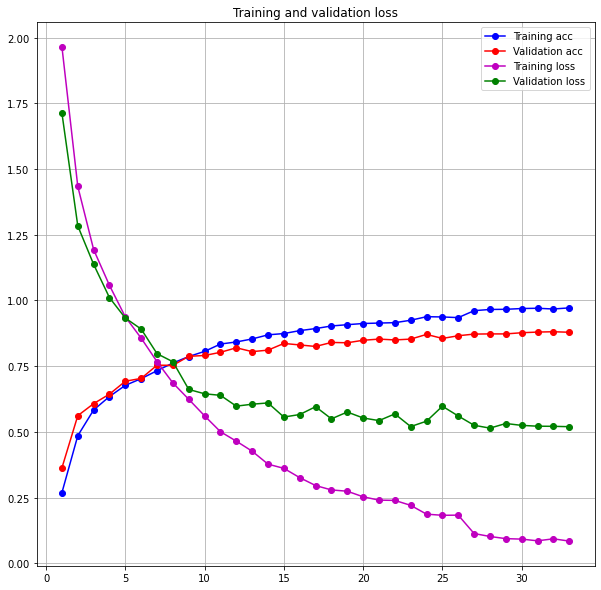

In [11]:
acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']
epochs_1 = range(1, len(acc_1) + 1)

plt.figure(figsize=(10,10))
plt.grid()
plt.plot(epochs_1, acc_1, 'b',marker='o', label='Training acc')
plt.plot(epochs_1, val_acc_1, 'r',marker='o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs_1, loss_1, 'm',marker='o', label='Training loss')
plt.plot(epochs_1, val_loss_1, 'g',marker='o', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
%%time
# Keras reported accuracy:
train_score_m1 = model.evaluate(x_train, y_train, verbose=1) 
print (f"model train data score_m1       :{train_score_m1}")

val_score_m1 = model.evaluate(x_val, y_val, verbose=1) 
print (f"model validation data score_m1  :{val_score_m1}")

test_score_m1 = model.evaluate(x_test, y_test, verbose=1) 
print (f"model Test data score_m1        :{test_score_m1}")

197/197 [==============================] - 48s 244ms/step - loss: 0.0335 - accuracy: 0.9932
model train data score_m1       :[0.0334630012512207, 0.9931594133377075]
50/50 [==============================] - 12s 233ms/step - loss: 0.5198 - accuracy: 0.8791
model validation data score_m1  :[0.5198119878768921, 0.8791348338127136]
28/28 [==============================] - 7s 256ms/step - loss: 0.5087 - accuracy: 0.8822
model Test data score_m1        :[0.5087111592292786, 0.8821510076522827]
Wall time: 1min 11s
